# Basic Classification
**Pemateri :**
*   Aris Budi Santoso
*   Reza Rizky Pratama

Ministry of Finance - Data Analytics Community

# Deskripsi Studi Kasus

## Permasalahan Bisnis
**Prediksi Kegagalan Sistem Tekanan Udara pada Truk Scania**

**Scania memiliki kebutuhan** untuk dapat memprediksi kegagalan sistem tekanan udara berdasarkan data komponen-komponen sistem yang dikumpulkan selama penggunaan harian. Prediksi kegagalan sistem tekanan udara pada Truk Scania diharapkan dapat mendorong pengecekan sedini mungkin terhadap sistem tekanan udara sehingga dapat meminimalkan biaya yang terjadi karena insiden kerusakan ketika truk sedang beroperasi.

**Biaya perbaikan** yang timbul dari kegagalan sistem tekanan udara yang terlambat diketahui adalah sebasar EUR500, sedangkan biaya pengecekan sistem tekanan udara yang tidak seharusnya dilakukan adalah sebesar EUR10. **Scania berharap** dapat menemukan model prediksi kegagalan sistem tekanan udara yang menghasilkan biaya paling rendah.

Sumber:
https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

## Deskripsi Data

Data yang digunakan merupakan data operasional Truk Scania yang telah dianonimisasi. Data tersebut dipublikasikan pada UCI Machine Learning Repository oleh Scania pada September 2016 dengan Lisensi GNU General Public. Data tersebut dikumpulkan dari penggunaan harian dari Truk Scania, khususnya terkait dengan sistem tekanan udara yang digunakan untuk mendukung mekanisme pengereman dan transmisi. Untuk kepentingan pembelajaran ini, jumlah baris data telah disesuaikan agar pemrosesannya menjadi lebih cepat.

Data terbagi ke dalam dua file yaitu file data untuk training dan testing, yaitu sebagai berikut :

|Item|Training|Testing|
|--- |--- |--- |
|Nama File |aps_failure_training_min.csv |aps_failure_test_min.csv |
|Jumlah Baris |10.000 |2000 |
|Jumlah Kolom/ Atribut |171 |171 |
|Deskripsi Kolom/ Atribut |Class, kemudian atribut operasional yang dianonimisasi |
|Jenis Data |Numeric |Numeric |
|Terdapat Missing Value |Ya |Ya |

Penjelasan Mengenai Attribut

Nama setiap atribut telah dianonimisasi karena alasan hak kepemilikan/ proprietary. Nama atribut terdiri dari dua bagian yang dipisahkan dengan "_". Bagian pertama merupakan identifier indikator sedangkan bagian kedua merupakan identifier bin dari atribut histogram

In [1]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EDA, Data Preprocessing dan Feature Engineering

In [2]:
#import library yang dibutuhkan
#Pengolahan data
import pandas as pd
import numpy as np

#EDA dan Preprocessing
from collections import Counter
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, SelectPercentile, chi2, SelectFromModel, RFECV
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier ,LogisticRegression, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier

#Performace Evaluation
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, LeaveOneOut
from sklearn.metrics import confusion_matrix,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score,fbeta_score,auc, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [3]:
#Apabila menggunakan Colab dan perlu menghubungkan dengan Gdrive
# from google.colab import drive
# drive.mount("/content/gdrive")

In [4]:
#Load data training (sesuaikan dengan path lokasi file pada storage anda)
link_train = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/05.%20Basic%20Machine%20Learning/use%20case%20ML/aps_failure_training_min.csv'
link_test = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/05.%20Basic%20Machine%20Learning/use%20case%20ML/aps_failure_test_min.csv'
df_alltrain = pd.read_csv(link_train)

In [5]:
#Menampilkan sebagian data
print(df_alltrain.shape)
df_alltrain.head()

(10000, 171)


class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [6]:
print("daftar kolom/ feature dari data adalah sebagai berikut :\n ",list(df_alltrain.columns))

daftar kolom/ feature dari data adalah sebagai berikut :
  ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch

In [7]:
#Mendefinisikan fungsi untuk mengubah kelas data menjadi numeric
def set_numeric_label(y):
  return y.replace(['neg','pos'],[0,1])

In [8]:
#Melakukan perubahan kelas data dari nominal menjadi numeric
print(df_alltrain['class'].unique())
df_alltrain['class'] = set_numeric_label(df_alltrain['class'])
print(df_alltrain['class'].unique())

['neg' 'pos']
[0 1]


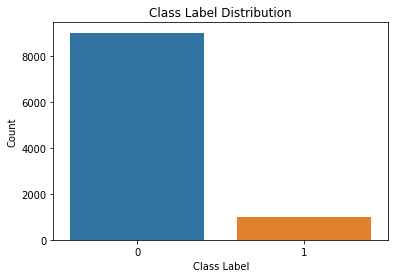

Jumlah baris kelas positif (1):  1000
Jumlah baris kelas negatif (0):  9000


In [9]:
# Visualisasi dari distribusi data berdasarkan kelas label
sns.barplot(df_alltrain['class'].unique(),df_alltrain['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('Jumlah baris kelas positif (1): ',df_alltrain['class'].value_counts()[1])
print('Jumlah baris kelas negatif (0): ',df_alltrain['class'].value_counts()[0])

Menampilkan feature yg merupakan histogram bin

In [10]:
# Menghitung jumlah bin dari setiap feature, mengurutkan berdasarkan jumlah dan menampilkan yang memiliki jumlah bin lebih besar dari 1
lsprefix = []
for col in df_alltrain.columns[1:]:
  pref = col.split("_")[0]
  lsprefix.append(pref)

dfpref = pd.DataFrame(lsprefix, columns=['pref'])
dfbin = dfpref.groupby('pref').size().reset_index(name='count').sort_values(['count'], ascending=False).query('count > 1')
lsbin = [p for p in dfbin['pref']]
dfbin
#print(lsbin)

pref  count
24    az     10
104   ee     10
68    cs     10
6     ag     10
25    ba     10
63    cn     10
23    ay     10

Missing value

In [11]:
# Mendefinisikan fungsi untuk mengganti na dan nan dengan np.NaN
def handleNA(df):
  df.replace(to_replace='nan', value = np.NaN,inplace = True)
  df.replace(to_replace = 'na', value = np.NaN, inplace = True)
  return df

# Mengganti na menjadi np.NaN
df_alltrain = handleNA(df_alltrain)

In [12]:
# Rekapitulasi jumlah missing value dari setiap attribut
lsna = []
for col in df_alltrain.columns:
  lsna.append([col, df_alltrain[col].isna().sum()*100/df_alltrain['class'].count()])

dfna = pd.DataFrame(lsna, columns=['attribute','percentage'])
dfna_srt = dfna.sort_values(['percentage'], ascending=False)

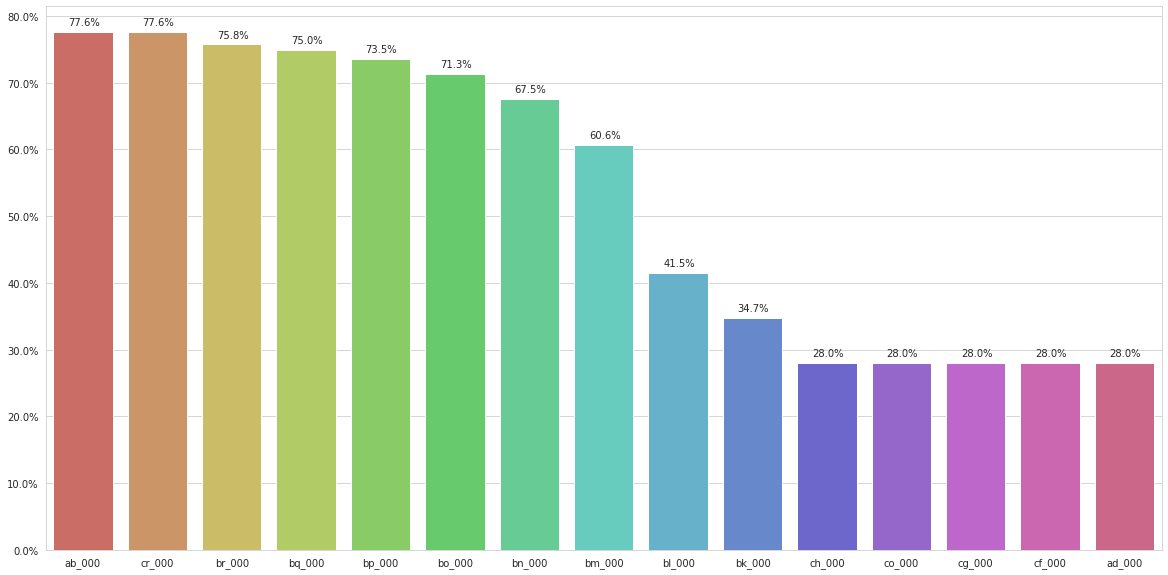

In [13]:
# Visualisasi grapik bar untuk menunjukan 15 kolom dengan persentase missing value tertinggi 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Grafik Bar
plot = sns.barplot(x= list(dfna_srt['attribute'])[:15],y = list(dfna_srt['percentage'])[:15],palette="hls")

# Menampilkan nilai persentase missing value di atas setiap bar
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Mengatur label sumbu y agar lebih mudah dibaca
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

## Preprocessing dan Feature Engineering

### Penanganan Missing Value

Missing value merupakan masalah yang kerap dihadapi dalam analisis data. Missing value dapat disebabkan oleh berbagai hal. Masalah ini manjadi kendala bagi proses penyusunan dan evaluasi model. Imputasi merupakan teknik yang dilakukan untuk penanganan masalah tersebut. 

Berdasarkan grafik di atas diketahui bahwa terdapat 10 atribut yang memiliki persentase missing value di atas 30%. Atribut-atribut tersebut akan dihilangkan. Sedangkan untuk atribut dengan missing value di bawah 30% akan dilakukan perbaikan dengan teknik imputasi

In [14]:
# Mendefinisikan fungsi untuk melakukan eliminasi feature berdasarkan missing value
def remove_na(df,nan_feat):
  # Eliminasi feature dengan missing value lebih besar dari 40% NA
  df = df.dropna(axis = 1, thresh=6000)

  # Mengeliminasi feature sesuai daftar feature pada parameter
  df = df.dropna(subset=nan_feat)

  # Reset Index
  df = df.reset_index(drop=True)
  return df

In [15]:
# Eliminasi feature berdasarkan tingkat missing value
df_alltrain = remove_na(df_alltrain,[])
print("Setelah eliminasi feature dengan missing value di atas 40%:",df_alltrain.shape)

Setelah eliminasi feature dengan missing value di atas 40%: (10000, 162)


In [16]:
df_alltrain.describe(include='all')

class        aa_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
count   10000.000000  1.000000e+04   9067   7202   9307   9307   9879   9879   
unique           NaN           NaN   1192   1073    139    159    102    407   
top              NaN           NaN      0      0      0      0      0      0   
freq             NaN           NaN   1388    347   8968   8957   9757   9437   
mean        0.100000  1.101444e+05    NaN    NaN    NaN    NaN    NaN    NaN   
std         0.300015  2.504882e+05    NaN    NaN    NaN    NaN    NaN    NaN   
min         0.000000  0.000000e+00    NaN    NaN    NaN    NaN    NaN    NaN   
25%         0.000000  1.215000e+03    NaN    NaN    NaN    NaN    NaN    NaN   
50%         0.000000  3.517700e+04    NaN    NaN    NaN    NaN    NaN    NaN   
75%         0.000000  6.147450e+04    NaN    NaN    NaN    NaN    NaN    NaN   
max         1.000000  2.746564e+06    NaN    NaN    NaN    NaN    NaN    NaN   

       ag_002 ag_003  ... ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008  \
count    9879   9879  ...   9878   9878   9878   9878   9878   9878   9878   
unique    895   2270  ...   7999   7479   7843   7813   7272   6930   5753   
top         0      0  ...      0      0      0      0      0      0      0   
freq     8921   7308  ...    264    290    331    476    711   1240   2634   
mean      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ee_009 ef_000 eg_000  
count    9878   9231   9231  
unique   2860     13     28  
top         0      0      0  
freq     5205   9178   9141  
mean      NaN    NaN    NaN  
std       NaN    NaN    NaN  
min       NaN    NaN    NaN  
25%       NaN    NaN    NaN  
50%       NaN    NaN    NaN  
75%       NaN    NaN    NaN  
max       NaN    NaN    NaN  

[11 rows x 162 columns]

In [17]:
def imputation(df,mis_col):
    
    # Sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN , strategy='median',copy=True)

    # Melakukan imputasi degan median untuk feature dengan missing value < 20%
    median_df = median_imputer.fit_transform(df[mis_col])
    df1 = df.copy()
    df1[mis_col] = median_df

    # Melakukan imputasi berbasis model untuk feature dengan missing value 20% ke atas
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0),
                                    random_state=0)
    imputed_df = pd.DataFrame(data = mice_imputer.fit_transform(df1) , columns= df1.columns )

    return imputed_df , median_imputer , mice_imputer

In [18]:
# List dari feature dengan persentase missing value < 20%
median_features = list(dfna_srt.query("percentage < 20")["attribute"])

#Menjalankan imputasi
imputed_train , MEDIAN_imputer , MICE_imputer = imputation( df_alltrain , median_features )

In [19]:
imputed_train.describe(include='all')

class        aa_000        ac_000        ad_000        ae_000  \
count  10000.000000  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean       0.100000  1.101444e+05  3.115098e+08  4.702646e+03      8.297800   
std        0.300015  2.504882e+05  7.528301e+08  8.830430e+05    156.643552   
min        0.000000  0.000000e+00  0.000000e+00 -6.620130e+07      0.000000   
25%        0.000000  1.215000e+03  2.200000e+01  4.400000e+01      0.000000   
50%        0.000000  3.517700e+04  1.720000e+02  2.940000e+02      0.000000   
75%        0.000000  6.147450e+04  9.005000e+02  6.546030e+02      0.000000   
max        1.000000  2.746564e+06  2.130707e+09  3.542524e+07  12048.000000   

            af_000        ag_000        ag_001        ag_002        ag_003  \
count  10000.00000  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean      14.53740  7.175074e+02  5.296989e+03  4.225660e+04  3.000448e+05   
std      241.95107  3.572760e+04  8.261809e+04  3.468125e+05  1.571358e+06   
min        0.00000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.00000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.00000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.00000  0.000000e+00  0.000000e+00  0.000000e+00  5.850000e+01   
max    11368.00000  3.376892e+06  4.109372e+06  1.055286e+07  2.904730e+07   

       ...        ee_002        ee_003        ee_004        ee_005  \
count  ...  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean   ...  7.807733e+05  3.624231e+05  7.602233e+05  7.488030e+05   
std    ...  1.976956e+06  9.351852e+05  1.973271e+06  2.270172e+06   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  4.029500e+03  1.715000e+03  4.321000e+03  6.510500e+03   
50%    ...  2.664090e+05  1.282530e+05  2.583060e+05  2.227980e+05   
75%    ...  5.142340e+05  2.534890e+05  5.549400e+05  4.671045e+05   
max    ...  3.123272e+07  1.454922e+07  2.700915e+07  5.743524e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean   6.146220e+05  5.078893e+05  2.021985e+05  1.125196e+04      0.096800   
std    1.909877e+06  2.013120e+06  7.839311e+05  7.503714e+04      4.158793   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    1.005500e+03  2.120000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    1.297280e+05  5.749100e+04  7.784000e+03  0.000000e+00      0.000000   
75%    3.295930e+05  1.971185e+05  1.435235e+05  2.030500e+03      0.000000   
max    3.160781e+07  4.382968e+07  1.926740e+07  3.810078e+06    362.000000   

             eg_000  
count  10000.000000  
mean       0.339200  
std       11.610548  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      892.000000  

[8 rows x 162 columns]

### Menghilangkan feature yang nilainya konstan

In [20]:
#Mendefinisikan fungsi untuk mencari feature yang nilainya konstan
def constant_value(df):
    constant_value_feature = []
    dfstd = pd.DataFrame(imputed_train.std(),columns=['std'])
    constant_value_feature = list(dfstd.query('std == 0').index)

    df.drop(constant_value_feature,axis=1,inplace=True)
    
    return df,constant_value_feature

In [21]:
#Membuang feature yang memiliki standar deviasi 0
imputed_train , dropped_feature = constant_value(imputed_train)
print("Feature yang dieliminasi karena memiliki nilai yg konstan/ std deviasinya 0 adalah : ",dropped_feature)
print("data setelah eliminasi feature: ",imputed_train.shape)

Feature yang dieliminasi karena memiliki nilai yg konstan/ std deviasinya 0 adalah :  ['cd_000']
data setelah eliminasi feature:  (10000, 161)


### Memeriksa tingkat korelasi antar satu feature dengan lainnya

Text(0.5, 1.0, 'Correlation Heatmap Scania')

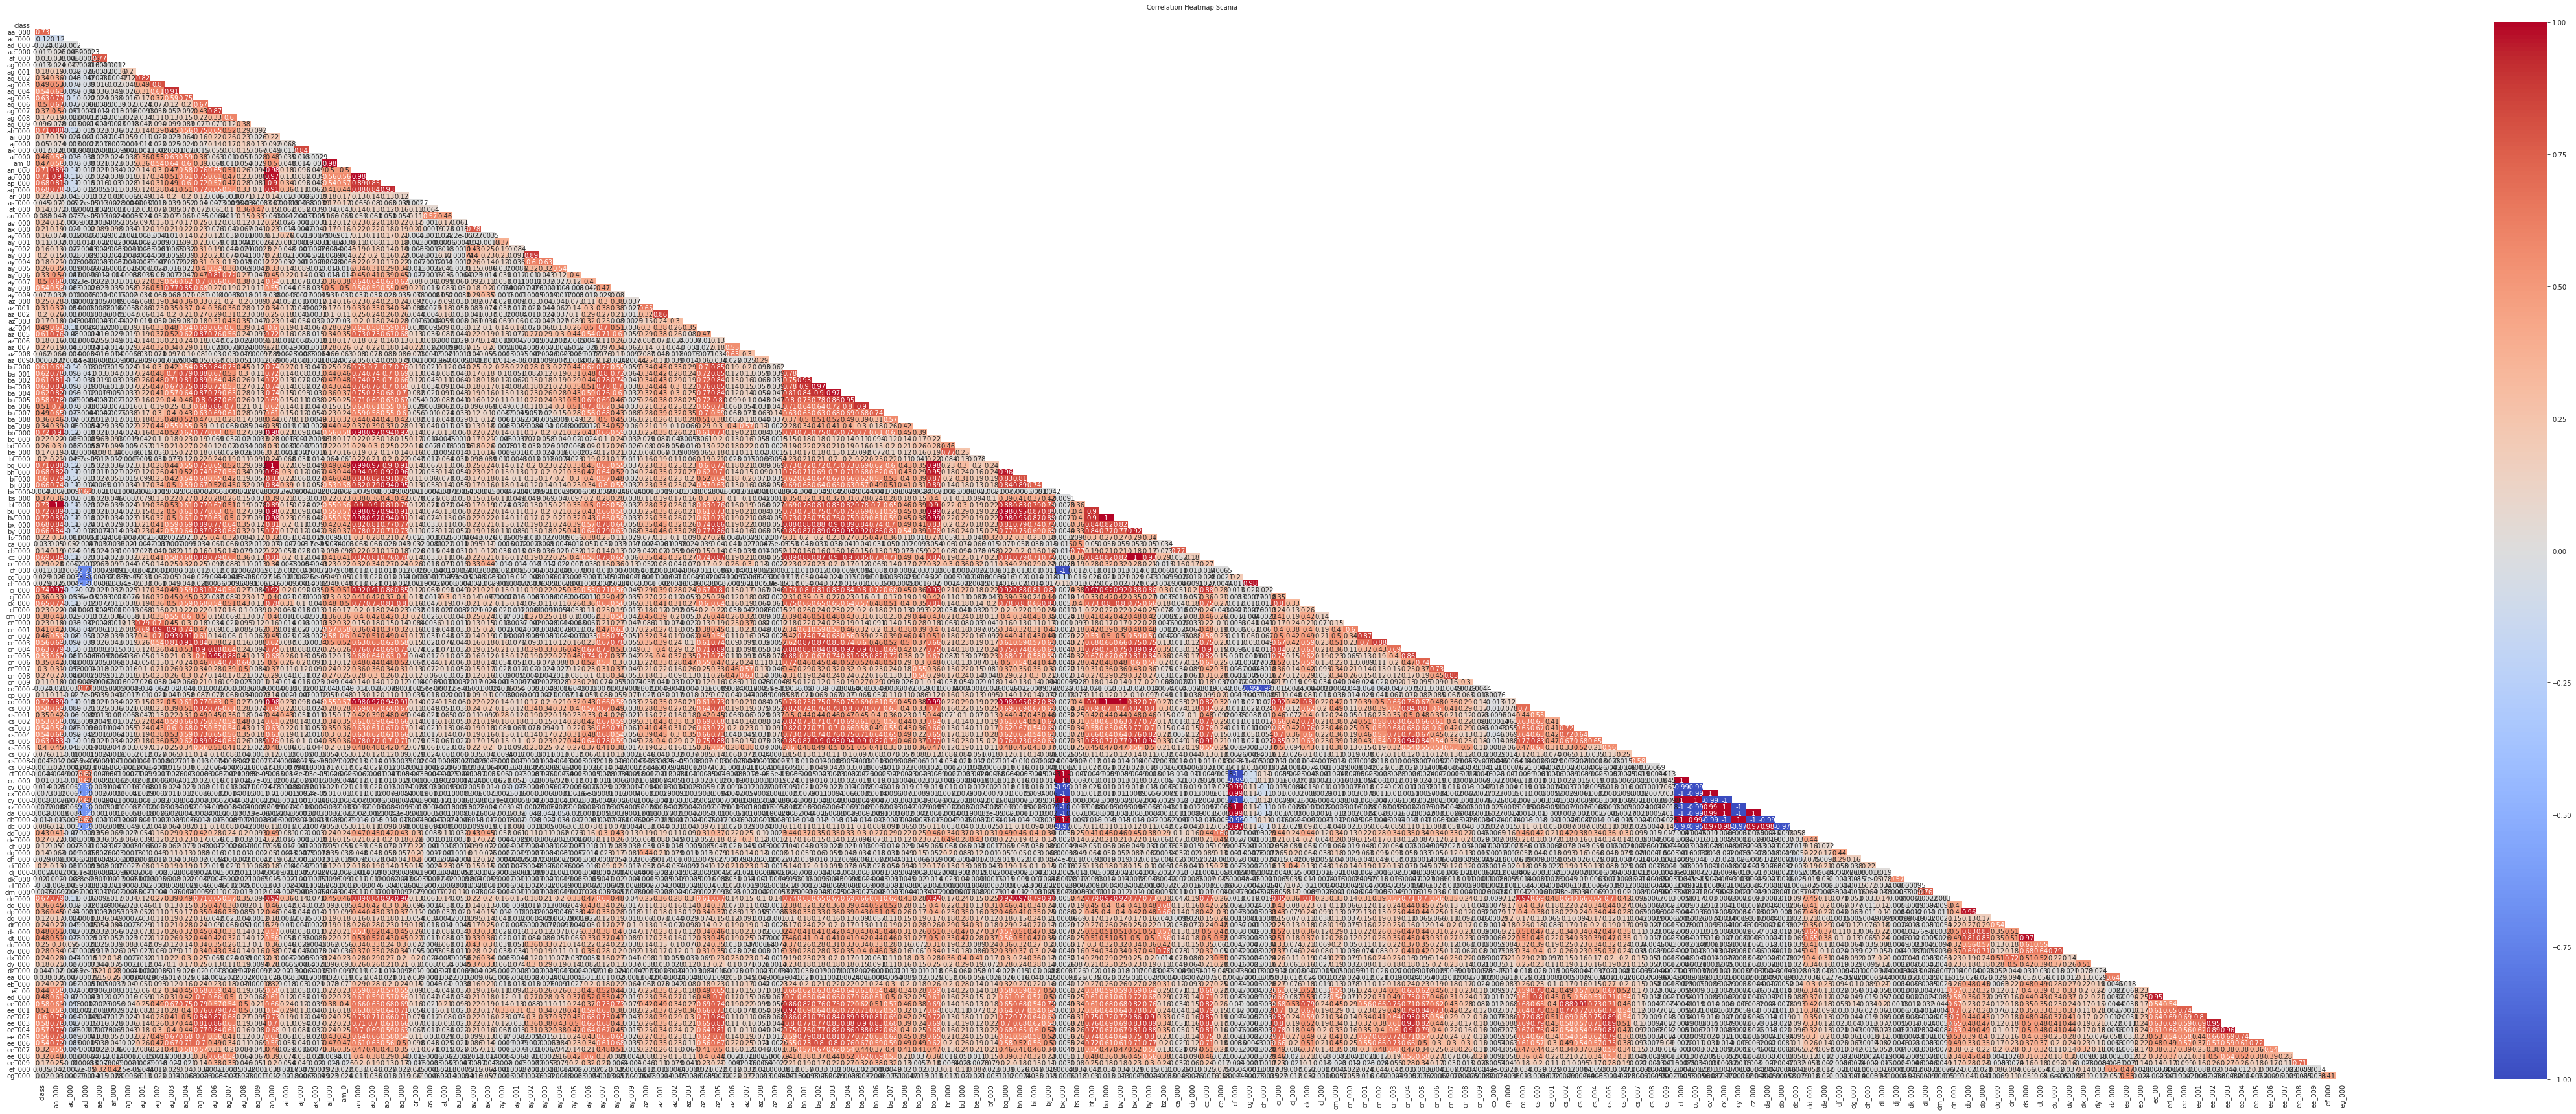

In [22]:
plt.figure(figsize=(80, 30))
matrix = np.triu(imputed_train.corr())
heatmap = sns.heatmap(imputed_train.corr(), vmin=-1, vmax=1, annot=True,cmap='coolwarm',mask = matrix)
heatmap.set_title('Correlation Heatmap Scania', fontdict={'fontsize':10}, pad=20)

### Memilih feature terbaik dari histogram/ bin
Sebagaimana telah di jelaskan pada bagian awal bahwa pada dataset ini terdapat 70 feature yang merupakan bin dari 7 histogram. Artinya setiap histogram memiliki 10 bin. Untuk penanganan data histogram ini akan dipilih 15 feature paling penting menggunakan metode Recursive Feature Elimination terhadap data yang telah melewati imputasi

In [23]:
# Memisahkan feature yang merupakan histogram untuk dilakukan pemilihan
lshisto = [c for c in imputed_train.columns if c.split('_')[0] in lsbin]

In [24]:
#membentuk dataframe dari feature histogram
dfhis = imputed_train[lshisto]

In [25]:
#Mendefinisikan fungsi untuk mendapatkan feature terbaik dengan menerapkan Recursive Feature Elimination
def get_important(df,y,n):   
    # Menggunakan algoritma RFE algorithm pada sklearn untuk menjalankan feature selection
    feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1),
                         n_features_to_select=n,
                         verbose=5)
    feature_select.fit(df,y)

    # support_ gives an array of True/False for each feature where True signifies that the feature is selected
    top_f = [ c for i,c in enumerate(df.columns.tolist()) if feature_select.support_[i] ]   
    return top_f

imp_feature_hist = get_important(dfhis,imputed_train['class'],15)
print("Feature penting yang ditemukan setelah Recursive Feature Elimination adalah : \n",imp_feature_hist)

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

feature histogram yang terpilih adalah  ['ag_002', 'ag_003', 'ag_005', 'az_000', 'az_002', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'cn_000', 'cs_002', 'cs_003', 'cs_004', 'ee_000', 'ee_005']

In [26]:
# Agar tidak mengulang proses feature selection karena waktu yg dibutuhkan cukup lama
imp_feature_hist = ['ag_002', 'ag_003', 'ag_005', 'az_000', 'az_002', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'cn_000', 'cs_002', 'cs_003', 'cs_004', 'ee_000', 'ee_005']

In [27]:
#Memisahkan feature selain histogram
lscolnohis = [c for c in imputed_train.columns if c not in lshisto]

In [28]:
#Menggabungkan feature histogram yang terpilih
lsfincol = lscolnohis + imp_feature_hist
print('Jumlah class dan feature setelah mengeliminasi sebagian feature histogram : ',len(lsfincol))

Jumlah class dan feature setelah mengeliminasi sebagian feature histogram :  106


In [29]:
#Membentuk data training yang akan digunakan untuk melatih model klasifikasi
fin_train = imputed_train[lsfincol]

### Membagi Feature untuk Training dan Validasi


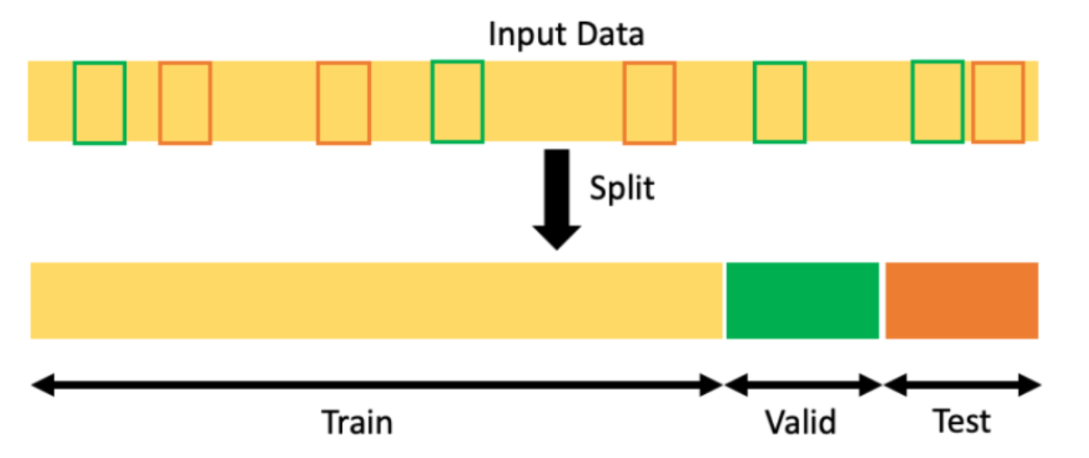


**Mengapa kita membagi data menjadi Train, Validation, dan Test?**

Kekhawatiran utama pada saat mendevelop sebuah model machine learning adalah model tidak dapat tergeneralisasi secara baik saat model digunakan untuk memprediksi data-data baru (unseen data). Kita tidak ingin model yang kita bangun memiliki performa yang baik saat dilatih namun level performa itu tidak dapat dicapai saat model dideploy untuk memprediksi data baru.

Untuk menilai generalisasi model machine learning, kita perlu membedakan antara dataset yang kita gunakan untuk melatih model machine learning dan dataset yang kita anggap unseen data baru untuk mengevaluasi performa model yang kita latih. Sehingga kita harus membagi antara dataset menjadi train dan test data: 

*   Train Dataset : sekumpulan data yang digunakan untuk melatih model machine learning kita.
*   Test Dataset : sekumpulan data yang digunakan untuk melakukan evaluasi dari model final yang sudah dilatih sebelumnya.

Agar evaluasi performa model machine learning dapat kita andalkan, kita anggap test data adalah data baru dan perlu dipisahkan sepenuhnya dari seluruh proses training sampai model selesai dibangun. Namun pada saat proses training, kita pun membutuhkan data yang terpisah dari data yang digunakan untuk training model untuk mengevaluasi performa suatu algoritma machine learning sehingga dapat dibandingkan dengan algoritma yang lainnya (refer ke isu generalisasi). Maka dari itu, data training yang sebelumnya telah disiapkan dapat dipotong kembali menjadi dataset yang kita sebut validation set. 

*   Validation Dataset : sekumpulan data yang digunakan untuk memberikan evaluasi dari model yang kita bangun saat melakukan pemilihan model dan tuning hyperparameter. Bisa juga digunakan untuk melakukan model preparation seperti feature selection.

In [30]:
#Memisahkan features dan label kelas
Y_train = fin_train['class']
X_train = fin_train.drop('class',axis=1)

In [31]:
#Membagi data untuk training dan testing model
X_train_ib, X_test_ib, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

### Penanganan Imbalance Data

Permasalahan imbalance data yaitu ketika jumlah data antara satu kelas dengan lainnya berbeda jauh/ timpang. Masalah akan mengakibatkan proses pembelajaran model yang tidak efektif pada kelas data minoritas. Solusi atas masalah ini adalah dengan melakukan oversampling pada kelas minoritas dan under sampling pada kelas mayoritas.

In [32]:
# Mendefinisikan fungsi untuk melakukan under dan over sampling
def handle_imbalance(df,label):
  over = SMOTE(sampling_strategy=0.3)
  under = RandomUnderSampler(sampling_strategy=0.5)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  dfb, label = pipeline.fit_resample(df, label)
  return pd.DataFrame(dfb,columns=df.columns), label

In [33]:
# Melakukan over dan under sampling untuk data training
x_bltrain , y_bltrain = handle_imbalance(X_train_ib , y_train)

# Melakukan over dan under sampling untuk data testing
x_bltest , y_bltest = handle_imbalance(X_test_ib , y_test)

print(x_bltrain.shape)
print(y_bltrain.shape)
print(x_bltest.shape)
print(y_bltest.shape)

(6468, 105)
(6468,)
(1629, 105)
(1629,)


In [34]:
# membuat dataframe dari class setelah over dan under sampling untuk tampilan grafik
df_y_bltrain = pd.DataFrame(y_bltrain, columns=['class'])
df_y_bltest = pd.DataFrame(y_bltest, columns=['class'])

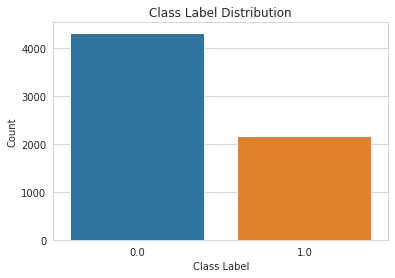

Jumlah baris kelas posifif (1):  2156
Jumlah baris kelas negatif (0):  4312


In [35]:
# Visualisasi dari distribusi data berdasarkan kelas label setelah dilakukan over sampling (SMOTE) dan under sampling
sns.barplot(df_y_bltrain['class'].unique(),df_y_bltrain['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('Jumlah baris kelas posifif (1): ',df_y_bltrain['class'].value_counts()[1])
print('Jumlah baris kelas negatif (0): ',df_y_bltrain['class'].value_counts()[0])

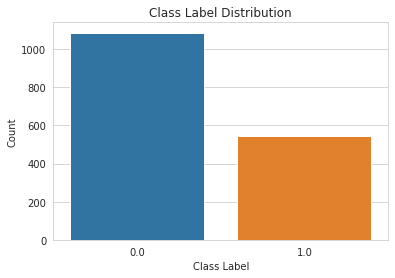

Jumlah baris kelas positif (1):  543
Jumlah baris kelas negatif (0):  1086


In [36]:
# Visualisasi dari distribusi data berdasarkan kelas label setelah dilakukan SMOTE
sns.barplot(df_y_bltest['class'].unique(),df_y_bltest['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('Jumlah baris kelas positif (1): ',df_y_bltest['class'].value_counts()[1])
print('Jumlah baris kelas negatif (0): ',df_y_bltest['class'].value_counts()[0])

In [37]:
#Standardizing the train and test data.
#from sklearn.preprocessing import StandardScaler
#std = StandardScaler()
#X_train_std = std.fit_transform(x_bltrain)
#X_test_std = std.fit_transform(x_bltest)

### Kesimpulan dari EDA dan Preprocessing

1. Data memiliki kondisi imbalance, perbandingan antara class positif dan negatif pada data training adalah 1 : 9;
2. Data memiliki permasalahan missing value yang cukup tinggi dan tersebar pada banyak feature, terdapat 9 feature dengan persentase missing value di atas 40%;
3. Terdapat satu feature yang memiliki nilai konstan 
4. Berdasarkan diagram hitmap, cukup banyak feature-feature yang saling berkorelasi;
5. Terdapat 70 feature yang merupakan bin dari 7 histogram.

Penanganan yang dilakukan untuk permasalahan:
#### Missing value
1. eliminasi feature yang memiliki missing value di atas 40%;
2. melakukan imputasi dengan strategi berikut:
  * Imputasi sederhana dengan median untuk feature dengan missing value < 20%
  * Imputasi berbasis model untuk feature dengan missing value >= 20% 

#### Feature dengan nilai konstan
1. Eliminasi feature dengan nilai konstan

#### Feature histogram/ bin
1. Melakukan pemilihan feature yang penting menggunakan teknik Recursive Feature Elemination

#### Class imbalance :
1. Melakukan over dan under sampling untuk data training



# Melatih Model Klasifikasi

## Linear Model


Model klassifikasi pada model linear ini menggunakan basis function yang sama dengan linear regression.

$$ Y_1 = w_0 + w_1\phi(x_1) + w_2\phi(x_2) ...$$

bedanya adalah untuk kasus klasifikasi basis function ini ditambahkan dengan activation function. contohnya, logistic regression menggunakan sigmoid sebagai activation function nya. activation function ini merubah hasil $Y$ menjadi range tertentu (sigmoid = 0-1)

![logress](https://miro.medium.com/max/1050/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg)

### Ridge Clasifier

In [38]:
# sklearn ridge classifier dengan alpha 0.0
lnr = RidgeClassifier(alpha=0.0)
#train the algorithm on training data and predict using the testing data
lnrclf = lnr.fit(x_bltrain, y_bltrain) 
lnrpred = lnrclf.predict(x_bltest)

print("Ridge classifier accuracy : ",accuracy_score(y_bltest, lnrpred, normalize = True))

Ridge classifier accuracy :  0.9281767955801105


In [39]:
target_names = ['0', '1']
print(classification_report(y_bltest, lnrpred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1086
           1       0.96      0.82      0.88       543

    accuracy                           0.93      1629
   macro avg       0.94      0.90      0.92      1629
weighted avg       0.93      0.93      0.93      1629



### Logistic Regression

In [40]:
lr = LogisticRegression()
# latih classifier dengan data train dan lakukan prediksi
lrclf = lr.fit(x_bltrain, y_bltrain) 
lrpred = lrclf.predict(x_bltest)

print("Logistic-Regression accuracy : ",accuracy_score(y_bltest, lrpred, normalize = True))

Logistic-Regression accuracy :  0.9410681399631676


In [41]:
target_names = ['0', '1']
print(classification_report(y_bltest, lrpred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1086
           1       0.93      0.89      0.91       543

    accuracy                           0.94      1629
   macro avg       0.94      0.93      0.93      1629
weighted avg       0.94      0.94      0.94      1629



## Naive Bayesian

Naive Bayes Classifier adalah Model machine learning berbasis probabilistik yang digunakan untuk tugas klasifikasi. 

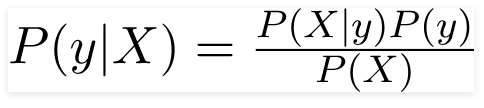

Jenis Naive Bayes:
1. Gaussian NB

Digunakan untuk predictor yang berupa continous data, dengan asumsi data mengikuti distribusi normal.

2. Multinomial NB

Banyak digunakan dalam klasifikasi dokumen. Digunakan untuk predictor yang berupa frekwensi kata.

3. Bernouli NB

Hampir serupa dengan Multinomial NB, namun feature yang digunakan berupa data boolean, contohnya bag of words.

In [42]:
gnb = GaussianNB()
# latih classifier dengan data train dan lakukan prediksi
nbclf = gnb.fit(x_bltrain, y_bltrain) 
nbpred = nbclf.predict(x_bltest)
print("Naive-Bayes accuracy : ",accuracy_score(y_bltest, nbpred, normalize = True))

Naive-Bayes accuracy :  0.9459791282995703


In [43]:
target_names = ['0', '1']
print(classification_report(y_bltest, nbpred, target_names=target_names))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1086
           1       0.95      0.89      0.92       543

    accuracy                           0.95      1629
   macro avg       0.95      0.93      0.94      1629
weighted avg       0.95      0.95      0.95      1629



## Suppport Vector Machine (SVM)

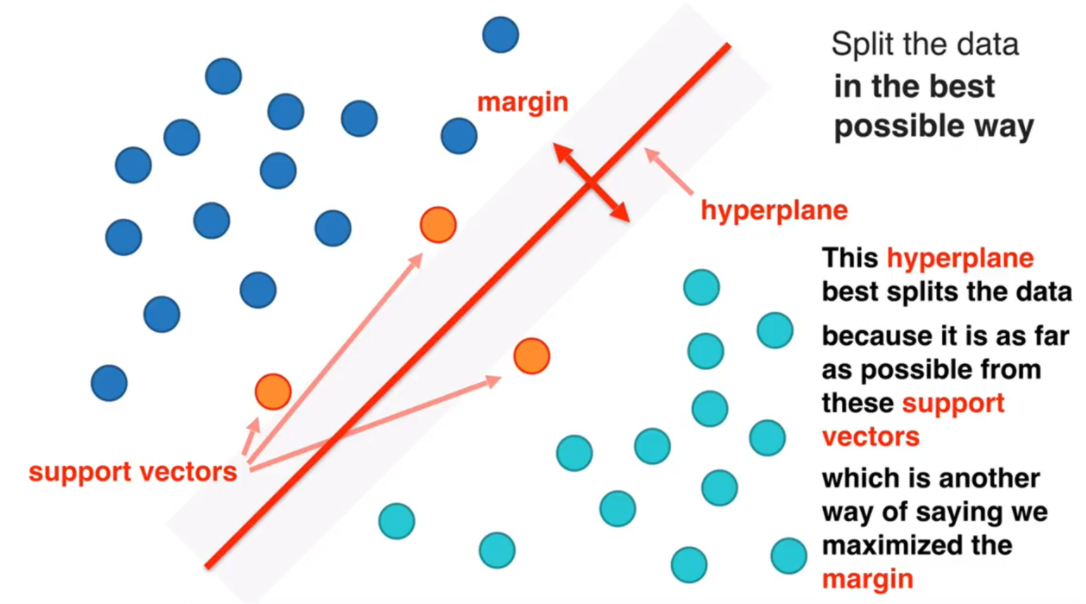

Cara kerja SVM untuk clasifikasi adalah dengan menentukan decision boundary (hyperplane) atas data sehingga menghasilkan jarak (margin/support) paling maksimal antara kategori-kategori yang akan di prediksi. Model ini bekerja dengan geometric property dari data bukan menggunakan pendekatan statistikal.

In [44]:
# Linear SVC
lsvc = LinearSVC()
# latih classifier dengan data train dan lakukan prediksi
lsvclf = lsvc.fit(x_bltrain, y_bltrain) 
lsvcpred = lsvclf.predict(x_bltest)

print("SVC accuracy : ",accuracy_score(y_bltest, lsvcpred, normalize = True))

SVC accuracy :  0.9066912216083487


In [45]:
target_names = ['0', '1']
print(classification_report(y_bltest, lsvcpred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1086
           1       0.81      0.94      0.87       543

    accuracy                           0.91      1629
   macro avg       0.89      0.92      0.90      1629
weighted avg       0.92      0.91      0.91      1629



In [46]:
# SVC dengan RBF Kernel
svc = SVC()

svclf = svc.fit(x_bltrain, y_bltrain) 
svcpred = svclf.predict(x_bltest)

print("SVC accuracy : ",accuracy_score(y_bltest, svcpred, normalize = True))

SVC accuracy :  0.9257213014119091


In [47]:
target_names = ['0', '1']
print(classification_report(y_bltest, svcpred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1086
           1       0.95      0.83      0.88       543

    accuracy                           0.93      1629
   macro avg       0.93      0.90      0.91      1629
weighted avg       0.93      0.93      0.92      1629



## Decission Tree

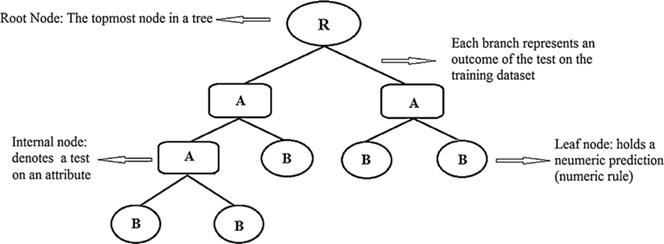

Model machine learning ini berisi aturan-aturan untuk memutuskan bagaimana data dipisahkan sehingga akhirnya dapat dihasilkan prediksi baik itu regresi maupun klasifikasi. Model decision Tree merupakan model yang cukup populer karena beberapa hal:
- model sangat mudah untuk dintepretasi dan dijelaskan
- dapat menggunakan data dalam bentuk categorical dan numerical untuk training
- dapat digunakan untuk kasus regresi dan klasifikasi
- performa nya masih dapat di tingkatkan dengan menggunakan data yang besar

kelemahan model ini adalah:
- sangat mudah overfit, sangat sensitif terhadap noise pada data
- butuh waktu lebih untuk tuning
- tidak support transfer learning

In [48]:
dtree = DecisionTreeClassifier()

dtclf = dtree.fit(x_bltrain, y_bltrain) 
dtpred = dtclf.predict(x_bltest)

print("Decission Tree accuracy : ",accuracy_score(y_bltest, dtpred, normalize = True))

Decission Tree accuracy :  0.9459791282995703


In [49]:
target_names = ['0', '1']
print(classification_report(y_bltest, dtpred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1086
           1       0.94      0.90      0.92       543

    accuracy                           0.95      1629
   macro avg       0.94      0.93      0.94      1629
weighted avg       0.95      0.95      0.95      1629



## K - Nearest Neighbors

![knn](https://miro.medium.com/max/810/0*BMFO6QFX55-oESwy.png)
KNN adalah salah satu model non parametrik yang mudah untuk dipahami. Sebuah data yang baru akan diprediksi sesuai dengan data-data yang terdekat. Untuk menghitung jarak terdekat digunakan beberapa metric distance antara lain euclidean_distance atau manhattan_distance. Oleh karena itu, seluruh feature yang digunakan sebagai data training harus memiliki range yang mirip. Untuk itu, data trainig perlu di preprocess menggunakan scaler atau transformasi data lainnya 

In [50]:
neigh = KNeighborsClassifier(n_neighbors=3)

knclf = neigh.fit(x_bltrain, y_bltrain) 
knpred = knclf.predict(x_bltest)

print("KNN accuracy : ",accuracy_score(y_bltest, knpred, normalize = True))

KNN accuracy :  0.9330877839165131


In [51]:
target_names = ['0', '1']
print(classification_report(y_bltest, knpred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1086
           1       0.91      0.88      0.90       543

    accuracy                           0.93      1629
   macro avg       0.93      0.92      0.92      1629
weighted avg       0.93      0.93      0.93      1629



# Validasi Model

## Indikator dan Metric

### Confusion Matrix

![conf](https://miro.medium.com/max/1400/1*IzN36IDL95ASZcV7g_KRUg.jpeg)

*   Accuracy = (TP+TN) / (TP+FP+FN+TN)
: menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar
*   Precision = (TP) / (TP + FP)
: menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
*   Recall  = TP / (TP + FN)
: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi
*   F-1 Score  = (2 * Recall * Precision) / (Recall + Precision)
: menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan
*   Support  = jumlah kemunculan aktual dari kelas dari sebuah dataset

![image](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

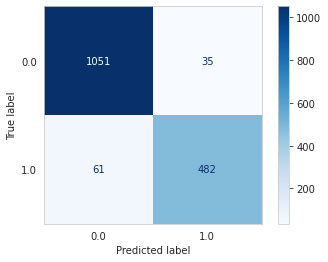

In [52]:
cm_test = confusion_matrix(y_bltest, lrpred, labels=nbclf.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lrclf.classes_)
disp_test.plot(cmap='Blues', values_format='').ax_.grid()

In [53]:
con_mat =confusion_matrix (y_bltest, lrpred)
print("-"*117)
print('Confusion Matrix: ', '\n',con_mat)
print("-"*117)
tn, fn, tp, fp=con_mat[0][0],con_mat[0][1],con_mat[1][1],con_mat[1][0]

print("True Positive = ", tp)
print("False Positive = ", fp)
print("True Negative = ", tn)
print("False Negative = ", fn)
print("-"*117)

acc = (tp+tn)/(tp+fp+tn+fn)
prec = tp/(tp+fp)
rec = tp/(tp+fn)
f1 = 2*prec*rec/(prec+rec)
print("Accuracy = ", acc)
print("Precision = ", prec)
print("Recall = ", rec)
print("F1 Score = ", f1)


---------------------------------------------------------------------------------------------------------------------
Confusion Matrix:  
 [[1051   35]
 [  61  482]]
---------------------------------------------------------------------------------------------------------------------
True Positive =  482
False Positive =  61
True Negative =  1051
False Negative =  35
---------------------------------------------------------------------------------------------------------------------
Accuracy =  0.9410681399631676
Precision =  0.8876611418047882
Recall =  0.9323017408123792
F1 Score =  0.909433962264151


### Kurva Receiver Operating Characyeristic - Area Under The Curve (ROC - AUC)

ROC adalah kurva probabilitas yang mengambarkan hubungan antara true positif rate dengan false positif rate. Sedangkan AUC merupakan ukuran yang merepresentasikan kemampuan model dalam memisahkan/ mengklasifikasikan data. model dengan nilai AUC yang lebih tinggi lebih baik dari pada model dengan nilai AUC yang lebih rendah dalam mengklasifikasikan data.



In [54]:
score_test = roc_auc_score(y_bltest, lrpred)
display(score_test)

0.9277163904235728

No Skill: ROC AUC=0.500
Logistic Regresion: ROC AUC=0.933
Naive Bayes: ROC AUC=0.977


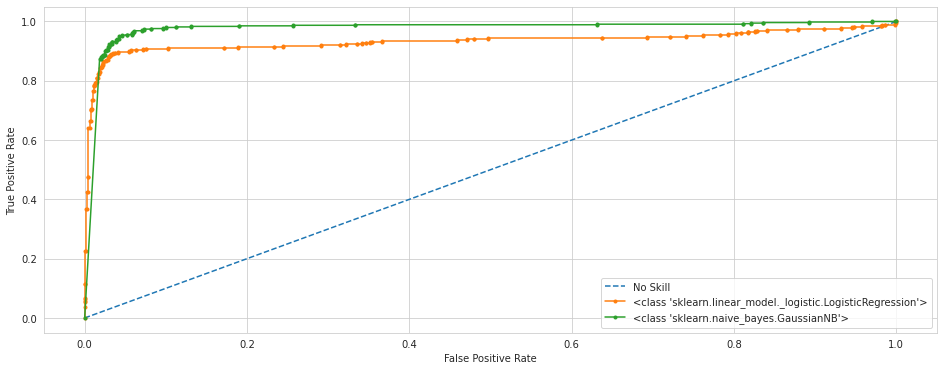

In [55]:
plt.figure(figsize=(16, 6))
lr_probs = lrclf.predict_proba(x_bltest)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_bltest, lr_probs)

nb_probs = nbclf.predict_proba(x_bltest)[:,1]
nb_fpr, nb_tpr, _ = roc_curve(y_bltest, nb_probs)

ns_probs = [0 for _ in range(len(y_bltest))]
ns_fpr, ns_tpr, _ = roc_curve(y_bltest, ns_probs)

ns_auc = roc_auc_score(y_bltest, ns_probs)
lr_auc = roc_auc_score(y_bltest, lr_probs)
nb_auc = roc_auc_score(y_bltest, nb_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regresion: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label="No Skill")
plt.plot(lr_fpr, lr_tpr, marker='.', label=type(lrclf))
plt.plot(nb_fpr, nb_tpr, marker='.', label=type(nbclf))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

### Precision Recall Curve

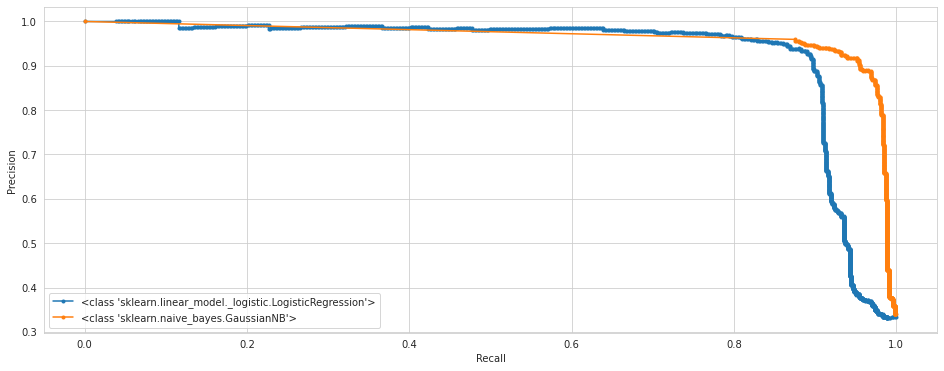

In [56]:
plt.figure(figsize=(16, 6))
lr_precision, lr_recall, _ = precision_recall_curve(y_bltest, lrclf.predict_proba(x_bltest)[:, 1], pos_label=lrclf.classes_[1])
nb_precision, nb_recall, _ = precision_recall_curve(y_bltest, nbclf.predict_proba(x_bltest)[:, 1], pos_label=nbclf.classes_[1])

lr_f1, lr_auc = f1_score(y_bltest, lrpred), auc(lr_recall, lr_precision)
nb_f1, nb_auc = f1_score(y_bltest, nbpred), auc(nb_recall, nb_precision)

plt.plot(lr_recall, lr_precision, marker='.', label=type(lrclf))
plt.plot(nb_recall, nb_precision, marker='.', label=type(nbclf))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

Menggunakan Kurva ROC atau Kurva Precision Recall ?

*the visual interpretability of ROC plots in the context of imbalanced datasets can be deceptive with respect to conclusions about the reliability of classification performance, owing to an intuitive but wrong interpretation of specificity. [Precision-recall curve] plots, on the other hand, can provide the viewer with an accurate prediction of future classification performance due to the fact that they evaluate the fraction of true positives among positive predictions*

Saito, T., & Rehmsmeier, M. (2015)

## Metode dan Teknik

### Hold Out

Validasi model dengan proporsi tertentu antara training dan testing set. Penyusunan training dan testing set hanya sekali dilakukan. Pada bagian sebalumnya telah dijelaskan mengenai pembagian data set dengan perbandingan antara data training dan testing 4 : 1

In [57]:
#Mengumpulkan hasil prediksi dengan beberapa classifier pada bagian sebelumnya
lsPredResult =[]
lsPredResult.append(['Linear Regresi',lnrpred])
lsPredResult.append(['Linear SVM',lsvcpred])
lsPredResult.append(['Naive Bayes',nbpred])
lsPredResult.append(['Logistic Regression',lrpred])
lsPredResult.append(['SVM RBF Kernel',svcpred])
lsPredResult.append(['Decission Tree',dtpred])
lsPredResult.append(['K-Nearest Neighbors',knpred])

#Mendefinisikan fungsi untuk menghitung metrik evaluasi kinerja model
def calculateMetric(lspred, y_test):
  lsres = []
  for prd in lspred:
    acc = accuracy_score(y_test, prd[1], normalize = True)
    prs = precision_score(y_test, prd[1], pos_label=1, average='binary')
    rcl =recall_score(y_test, prd[1], pos_label=1, average='binary')
    f1 = f1_score(y_test, prd[1], pos_label=1, average='binary')
    auc = roc_auc_score(y_test, prd[1])
    lsres.append([prd[0],acc,prs,rcl,f1,auc])
  return lsres

#menjalankan evaluasi model
dfeval = pd.DataFrame(calculateMetric(lsPredResult, y_bltest), columns=['Classifier','Accuracy','Precision','Recall','F1-Score', 'AUC Score'])
dfeval.sort_values(['F1-Score'], ascending=False)

Classifier  Accuracy  Precision    Recall  F1-Score  AUC Score
5       Decission Tree  0.945979   0.938343  0.896869  0.917137   0.933702
2          Naive Bayes  0.945979   0.948718  0.885820  0.916190   0.930939
3  Logistic Regression  0.941068   0.932302  0.887661  0.909434   0.927716
6  K-Nearest Neighbors  0.933088   0.912548  0.883978  0.898036   0.920810
0       Linear Regresi  0.928177   0.961039  0.817680  0.883582   0.900552
4       SVM RBF Kernel  0.925721   0.945148  0.825046  0.881023   0.900552
1           Linear SVM  0.906691   0.808847  0.942910  0.870748   0.915746

In [58]:
#Menghitung dan membandingkan biaya dari setiap model sesuai deskripsi permasalahan bisnis

def calculateCost(lspred, y_test):
  lsCost= []
  for prd in lspred:
    con_mat =confusion_matrix (y_test, prd[1])
    fp = con_mat[0][1]
    fn = con_mat[1][0]
    fpc = con_mat[0][1] * 10
    fnc = con_mat[1][0] * 500
    tc = fpc+fnc
    lsCost.append([prd[0],fp,fn,fpc,fnc,tc])
  return lsCost

#menjalankan evaluasi model berdasarkan biaya
dfeval = pd.DataFrame(calculateCost(lsPredResult, y_bltest), columns=['Classifier','Jumlah FP','Jumlah FN','Biaya FP','Biaya FN','Total Biaya'])
dfeval.sort_values(['Total Biaya'], ascending=True)

Classifier  Jumlah FP  Jumlah FN  Biaya FP  Biaya FN  Total Biaya
1           Linear SVM        121         31      1210     15500        16710
5       Decission Tree         32         56       320     28000        28320
3  Logistic Regression         35         61       350     30500        30850
2          Naive Bayes         26         62       260     31000        31260
6  K-Nearest Neighbors         46         63       460     31500        31960
4       SVM RBF Kernel         26         95       260     47500        47760
0       Linear Regresi         18         99       180     49500        49680

### K-Fold Cross Validation

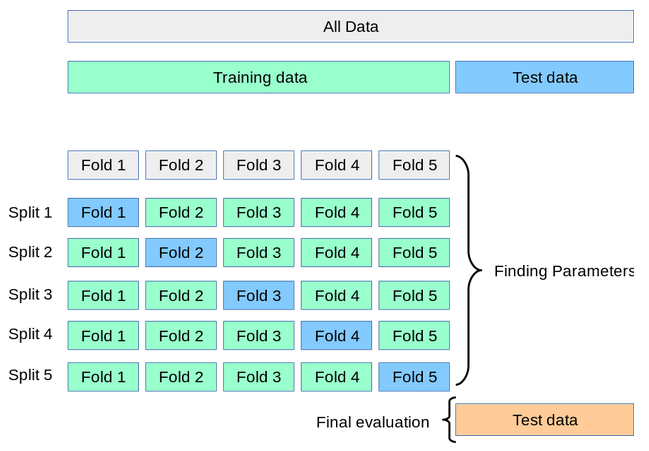

In [59]:
#Menyiapkan data training untuk cross validation
x_cvtrain, y_cvtrain = handle_imbalance(X_train, Y_train)

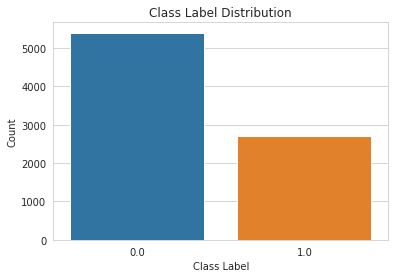

The number of positive class points is:  2700
The number of negative class points is:  5400


In [60]:
# Visualisasi dari distribusi data berdasarkan kelas label setelah dilakukan SMOTE
df_y_cvtrain = pd.DataFrame(y_cvtrain, columns=['class'])
sns.barplot(df_y_bltrain['class'].unique(),df_y_cvtrain['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',df_y_cvtrain['class'].value_counts()[1])
print('The number of negative class points is: ',df_y_cvtrain['class'].value_counts()[0])

In [61]:
lnr = RidgeClassifier(alpha=0.0)
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
lsvc = LinearSVC()
dtree = DecisionTreeClassifier()
neigh = KNeighborsClassifier(n_neighbors=3)

In [62]:
# Mendefinisikan fungsi untuk melakukan cross validation
def docrossval(clf, k):
  cvreport = cross_validate(clf, x_cvtrain, y_cvtrain, scoring=['accuracy','precision_macro','recall_macro','f1_macro'], cv=k, n_jobs= -1, return_train_score= True)
  print(cvreport)
  print('---'*50)
  print('Average Fitting Time',np.average(cvreport['fit_time']))
  print('Average Scoring Time',np.average(cvreport['score_time']))
  print('Average Train Accuracy',np.average(cvreport['train_accuracy']))
  print('Average Test Accuracy',np.average(cvreport['test_accuracy']))
  print('Average Train Precision Score',np.average(cvreport['train_precision_macro']))
  print('Average Test Precision Score',np.average(cvreport['test_precision_macro']))
  print('Average Train Recall Score',np.average(cvreport['train_recall_macro']))
  print('Average Test Recall Score',np.average(cvreport['test_recall_macro']))
  print('Average Train F1 Score',np.average(cvreport['train_f1_macro']))
  print('Average Test F1 Score',np.average(cvreport['test_f1_macro']))


In [63]:
# Menjalankan k fold cross validation
docrossval(lr, 10)

{'fit_time': array([0.5093677 , 0.46351194, 0.52168393, 0.49240041, 0.51133108,
       0.52554321, 0.55682397, 0.51759148, 0.46277285, 0.4285171 ]), 'score_time': array([0.01218748, 0.0105474 , 0.01166868, 0.01663995, 0.01181984,
       0.01159668, 0.01322556, 0.01123023, 0.01145935, 0.00614905]), 'test_accuracy': array([0.9345679 , 0.92345679, 0.92962963, 0.92716049, 0.94197531,
       0.92716049, 0.94691358, 0.93580247, 0.93703704, 0.94444444]), 'train_accuracy': array([0.93072702, 0.93484225, 0.93278464, 0.93840878, 0.93607682,
       0.93278464, 0.9388203 , 0.93895748, 0.93223594, 0.93155007]), 'test_precision_macro': array([0.93300857, 0.91583417, 0.92396834, 0.92619677, 0.93652415,
       0.91552761, 0.93992907, 0.92845046, 0.92543633, 0.94177312]), 'train_precision_macro': array([0.92471971, 0.92958891, 0.92549847, 0.93357683, 0.92994756,
       0.92219993, 0.93289969, 0.93228773, 0.92376543, 0.92625255]), 'test_recall_macro': array([0.91851852, 0.91111111, 0.91666667, 0.9083333

In [64]:
# Mendefinisikan fungsi untuk membandingkan hasil cross validation dari setiap classifier
def recCrossval(lsclf, xtrain, ytrain, k):
  lsCvResult = []
  for clf in lsclf:
    cvreport = cross_validate(clf[1], xtrain, ytrain, scoring=['accuracy','precision_macro','recall_macro','f1_macro'], cv=k,n_jobs= -1, return_train_score= True)
    lsCvResult.append([clf[0],np.average(cvreport['fit_time']),np.average(cvreport['test_accuracy']),np.average(cvreport['test_precision_macro']),np.average(cvreport['test_recall_macro']),np.average(cvreport['test_f1_macro'])])
  return lsCvResult

In [65]:
lsclfr = []

lsclfr.append(['Linear Regression',lnr])
lsclfr.append(['Logistic Regression',lr])
lsclfr.append(['Naive Bayes',gnb])
lsclfr.append(['Linear Support Vector Machine',lsvc])
lsclfr.append(['Decission Tree',dtree])
lsclfr.append(['K - Nearest Neighbor',neigh])
lsclfr.append(['SVM RBF Kernel',svc])

res = recCrossval(lsclfr, x_cvtrain, y_cvtrain, 10)


In [66]:
dfcvresult = pd.DataFrame(res, columns=['classifier','avg fit time','avg accuracy','avg precision macro','avg recall macro','avg f1 macro'])
dfcvresult.sort_values(['avg f1 macro'], ascending=False)

classifier  avg fit time  avg accuracy  \
5           K - Nearest Neighbor      0.033122      0.963086   
4                 Decission Tree      1.411746      0.953951   
2                    Naive Bayes      0.045943      0.938395   
1            Logistic Regression      0.510479      0.934815   
0              Linear Regression      0.064045      0.928642   
6                 SVM RBF Kernel      2.331192      0.924815   
3  Linear Support Vector Machine      4.719009      0.858642   

   avg precision macro  avg recall macro  avg f1 macro  
5             0.953403          0.965833      0.959047  
4             0.947565          0.949444      0.948171  
2             0.935629          0.924815      0.929851  
1             0.928665          0.924444      0.926305  
0             0.936143          0.903056      0.916761  
6             0.925836          0.903519      0.913227  
3             0.848902          0.848519      0.840859

### Leave One Out Cross Validation

Leave one cross validation merupakan versi ekstrim dari k-fold cross validation dengan konfigurasi k = jumlah instance/ baris data training. Metode ini tidak cocok untu dataset yang besar karena membutuhkan computational cost yang besar.

In [67]:
# Menjalankan leave one out CV (membutuhkan waktu yg lama untuk prosesnya)
# loo = LeaveOneOut()
# docrossval(lr, loo)

# Kompleksitas Model

## Kecocokan Model : Overfit, Underfit, atau Goodfit

* Overfitting : Hal ini terjadi ketika model bekerja sangat baik dengan data-train namun memiliki performa kurang baik saat diberikan data-validation dan data-test, biasanya disebabkan karena model terlalu kompleks sehingga menangkap setiap data noise yang ada (Bias yang rendah dan Variance yang tinggi)

* Underfitting : Hal ini terjadi ketika model tidak dapat menangkap pola yang kompleks pada data sehingga memiliki performa yang buruk saat train , test , dan validation. Biasanya terjadi pada model yang cenderung sederhana. (Bias yang tinggi dan Variance yang rendah).


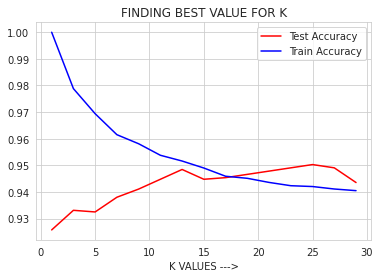

In [68]:
p = list(range(1, 31, 2))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_bltrain, y_bltrain)
    z = knn.score(x_bltest, y_bltest)
    t = knn.score(x_bltrain, y_bltrain)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K')
plt.legend()

# Tunning Model

## Bias dan Variance Trade Off

Dalam machine learning, terdapat error yang di hasilkan dari model dapat didefinisikan seperti berikut :

Err(x) = Bias2 + Variance + Irreducable error

Irreducable error merupakan error yang tidak bisa dikurangi dengan membuat model yang baik. Biasanya error ini merepresentasikan jumlah noise dari data kita yang tidak bisa ditangkap informasinya oleh model.

Untuk mendapatkan model yang performanya cukup baik maka model machine learning perlu ditune agar mendapat kompleksitas model yang optimal untuk mendapatkan keseimbangan antara Bias dan Variance sehingga dapat diminimalisir error atas prediksi modelnya.

Jika model dibuat lebih kompleks, bias error akan semakin rendah namun variance error akan meningkat. Perubahan ini efektif dilakukan jika kita mendapat model machine learning yang masih underfit. Sedangkan jika model machine learning kita terlalu overfit pada data, model dapat ditune untuk mengurangi kompleksitas model.

## Menambah atau Mengurangi Feature

### Feature Engineering

Menambahkan feature baru dengan melakukan proses feature engineering kembali dapat mengurangi bias error pada model-model yang terdeteksi underfit. Harapannya adalah performa model meningkat namun tetap dilevel yang optimal dengan menjaga peningkatan tingkat error variance.

### Feature Reduction

Feature reduction bertujuan untuk mengurangi informasi untuk dilatih pada model machine learning. Harapannya, performa model overfit meningkat dengan mengurangi variasi error walau menurunkan performa model pada data training.

Alternatif pendekatan untuk melakukan feature reduction:
- pendekatan statistik
- memilih feature penting sesuai hasil model
- dimentionality reduction

#### Pendekatan Statistik

In [69]:
# KBest hanya memilih K-number feature yang paling bagus test statistiknya 
norm = MinMaxScaler()
X_norm = norm.fit_transform(x_cvtrain.copy())

x_newtrain = SelectKBest(chi2, k=60).fit_transform(X_norm, y_cvtrain)
x_newtrain.shape

(8100, 60)

DT Train    0.941084
DT Test     0.940864
dtype: float64

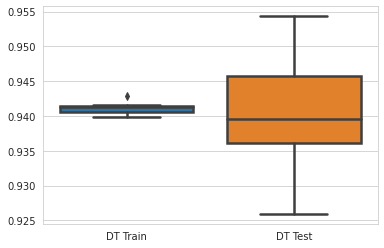

In [70]:
score_dt = cross_validate(lrclf, x_newtrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True)
column = {'DT Train': score_dt['train_score'], 'DT Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

#### Pendekatan Model

In [71]:
feature_select = SelectFromModel(lrclf, prefit=True)
x_mdltrain = feature_select.transform(x_cvtrain)
x_mdltrain.shape

(8100, 28)

In [72]:
mask = feature_select.get_support()
mdlfeat = []
for bool, feature in zip(mask, x_cvtrain.columns):
    if bool :
        mdlfeat.append(feature)

LR Train    0.941948
LR Test     0.940370
dtype: float64

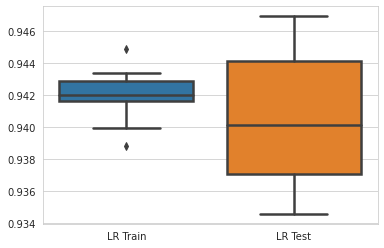

In [73]:
# Coba data baru
score_dt = cross_validate(lrclf, x_mdltrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True)
column = {'LR Train': score_dt['train_score'], 'LR Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

In [74]:
# RFE Cross Validation
#Mendefinisikan fungsi untuk mendapatkan feature terbaik dengan menerapkan Recursive Feature Elimination
def do_rfe(df,y,n):   
    # Menggunakan algoritma RFE algorithm pada sklearn untuk menjalankan feature selection
    feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1, n_jobs=-1),
                         n_features_to_select=n,
                         verbose=5)
    feature_select.fit(df,y)

    # support_ gives an array of True/False for each feature where True signifies that the feature is selected
    top_f = [ c for i,c in enumerate(df.columns.tolist()) if feature_select.support_[i] ]   
    return top_f

imp_feat_rfe = do_rfe(x_cvtrain,y_cvtrain,50)
print("Feature penting yang ditemukan setelah Recursive Feature Elimination adalah : \n",imp_feat_rfe)

Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with

#### Dimensionality Reduction (PCA)

Principal component analysis (PCA) ada adalah salah satu pendekatan untuk melakukan dimentionality reduction. PCA memroses seluruh variable untuk mendapatkan beberapa principal components dan menggunakannya sebagai bentuk dataset baru. Principal components tersebut diurutkan berdasarkan kemampuannya dalam menangkap variasi dari keseluruhan data. Biasanya hanya beberapa dari komponen tersebut yang digunakan dan sisanya akan diabaikan.

Untuk kebutuhan EDA, biasanya hanya 2 atau 3 komponen yang paling banyak menangkap variance dari data yang diambil dan kemudian digunakan untuk visualisasi. Sedangkan untuk kebutuhan tuning model, PCA digunakan untuk mengurangi jumlah feature dengan tetap mempertahankan informasi pada keseluruhan data.

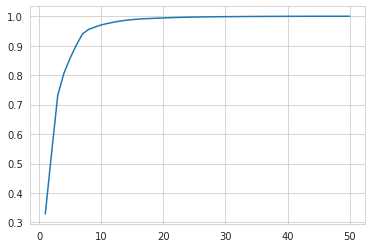

In [75]:
# PCA sangat membutuhkan proses scaling/transforming data sebelum digunakan
norm = Normalizer()
X_norm = norm.fit_transform(x_cvtrain)

pca = PCA(n_components=50)
pca.fit(X_norm)
sns.lineplot(range(1,51),pca.explained_variance_ratio_.cumsum())

(8100, 50)


LR Train    0.912401
LR Test     0.911975
dtype: float64

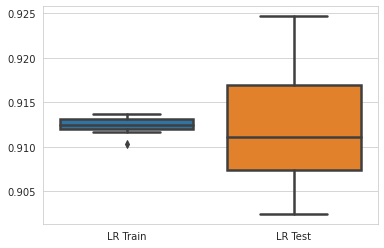

In [76]:
pca = PCA(n_components=50)
x_pca_train = pca.fit_transform(X_norm)
print(x_pca_train.shape)

# Coba data baru
score_dt = cross_validate(lr, x_pca_train, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True)
column = {'LR Train': score_dt['train_score'], 'LR Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

In [77]:
n_pcs= pca.components_.shape[0]
initial_feature_names = x_cvtrain.columns
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
pca_imp_feat = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

## Hyperparameter Tunning

In [78]:
# Mendefinisikan fungsi untuk melakukan tunning dengan Grid Search Cross Validation
def tuning( x , y , model , params , cv=10 ,verbose=10 ):
    clf = GridSearchCV(estimator= model,
                       param_grid= params,
                       scoring= 'f1_macro',
                       cv= cv,                         
                       verbose= verbose, return_train_score=True,
                       n_jobs= -1)
    
    clf.fit( x , y )
    return clf.best_params_ , clf.best_score_, clf.cv_results_

### Logistic Regression

In [79]:
# Mendefinisikan parameter untuk tunning
params = {"C":[10**i for i in range(-5,6)]}
#params["solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']]
# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(x_cvtrain,
                                        y_cvtrain,
                                        LogisticRegression(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
 Best Parameters: {'C': 1} with score of: 0.9263045739865179


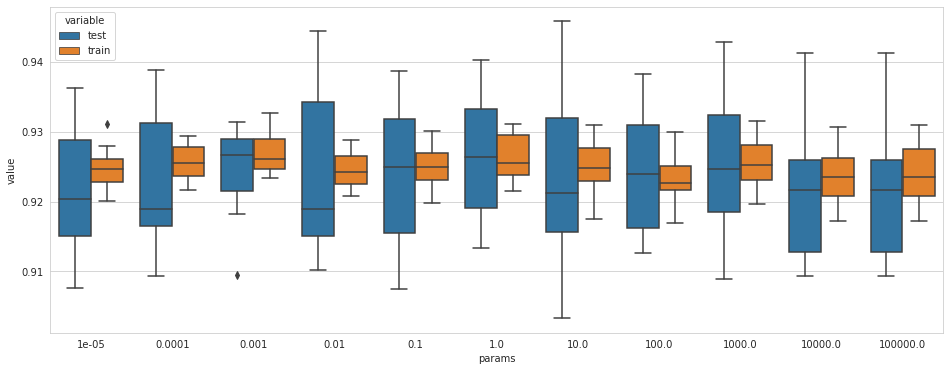

In [80]:
result = cv_result
grid_result = {"params":[d['C'] for d in result['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    
plt.figure(figsize=(16, 6))
grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

### Naive Bayes

In [81]:
# Mendefinisikan parameter untuk tunning
params = {'var_smoothing': np.random.uniform(1e-16,1e-14,100)}

# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(x_cvtrain,
                                        y_cvtrain,
                                        GaussianNB(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
 Best Parameters: {'var_smoothing': 2.908282145239285e-16} with score of: 0.9331809709999664


### SVM

Salah satu parameter yang dapat ditunning pada SVM dengan non linear hyper plane adalah gamma. Semakin tinggi nilai gamma maka model akan semakin mengikuti pola dari data training

In [82]:
radian_svm = SVC()
params = {"gamma": [10**i for i in range(-18,-10, 2)]}

# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(x_cvtrain,
                                        y_cvtrain,
                                        radian_svm,
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
 Best Parameters: {'gamma': 1e-14} with score of: 0.9420026627560354


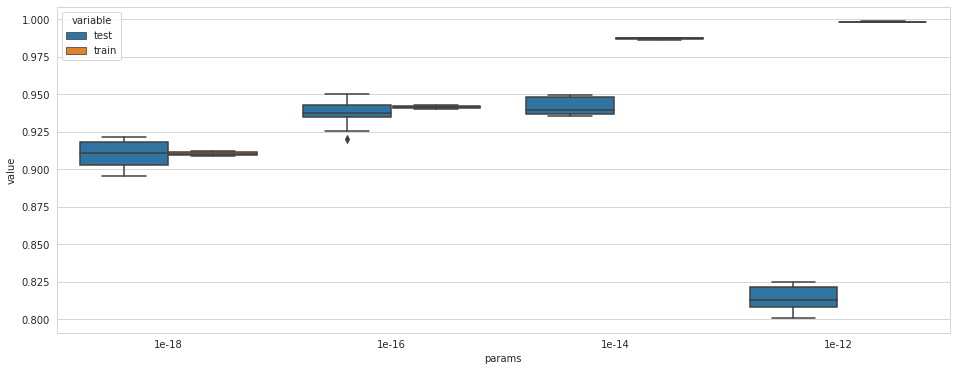

In [83]:
result = cv_result
grid_result = {"params":[d['gamma'] for d in result['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    
plt.figure(figsize=(16, 6))
grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

### Decision Tree

**Tuning Decision Tree**

Seperti dijelaskan diatas, model tree based sangat sensitif terhadap noise dan outlier sehingga lebih mudah untuk overfit. Sehingga itu perlu strategy untuk mengurangi kemungkinan overfit itu. Model ini juga dikenal memiliki banyak sekali hyperparameter yang dapat ditune. Untuk dapat memahaminya, hyperparameter tersebut dapat dibagi 2 sesuai dengan pendekatan yang dihasilkan:

- Stopping criteria

Hyperparameter yang ada dikelompok ini diset agar algoritma decision tree berhenti membuat cabang baru agar tidak terlalu overfit. Terdapat 3 hyperparameter yang dapat ditune pada pendekatan ini antara lain:
1. **max_depth**

max_depth dimaksudkan untuk menentukan sedalam apa cabang pada decision tree dapat dibuat. Cabang yang terlalu dalam akan membuat model lebih kompleks dan overfit, sedangkan cabang terlalu rendah akan membuat model underfit

2. **min_samples_split**

Hyperparameter ini menentukan berapa data/sample minimal pada sebuah node yang dapat dicabangkan lagi menjadi level dibawahnya. Semakin besar value pada hyperparameter ini, semakin sulit model untuk melakukan split sehingga model akan semakin simple. Nilai paling ideal min_samples_split biasanya ada diantara 2 dan 40.

3. **min_samples_leaf**

min_samples_leaf adalah jumlah sample minimum sebuah node dapat menjadi sebuah leaf. hyperparameter berhubungan dengan min_samples_split karena min_samples_leaf dilihat saat min_samples_split terpenuhi. Semakin besar value pada hyperparameter ini, semakin sulit model untuk melakukan split sehingga model akan semakin simple. Nilai ideal min_samples_leaf biasanya ada diantara 1 dan 20.

- Pruning

Hyperparameter pada kelompok ini akan mengurangi leaf yang telah dihasilkan sebelumnya sehingga model akan lebih sederhana dan terhindar dari overfit.

1. **min_weight_fraction_leaf**

Hyperparameter ini digunakan untuk mengurangi leaf yang jumlah sample weight didalamnya kurang dari yang ditetapkan. sample_weight dapat diset untuk mengurangi efek data imbalance, jika tidak diset, tiap class target akan memiliki weight yang sama. Karena bergantung dari weight tiap kelas sample, hyperparameter ini akan lebih bias kepada class yang dominan.

2. **min_impurity_decrease**

Tiap split diharapkan membuat data lebih mudah untuk dikelompokan, sehingga split-split yang efek mengurangi impurity data kurang dari value yang diset di hyperparameter ini akan dihilangkan.

In [84]:
# Tunning max depth
# Mendefinisikan parameter untuk tunning
params =  {"max_depth": range(1,20)}

# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(x_cvtrain,
                                        y_cvtrain,
                                        DecisionTreeClassifier(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
 Best Parameters: {'max_depth': 7} with score of: 0.9557036609604598


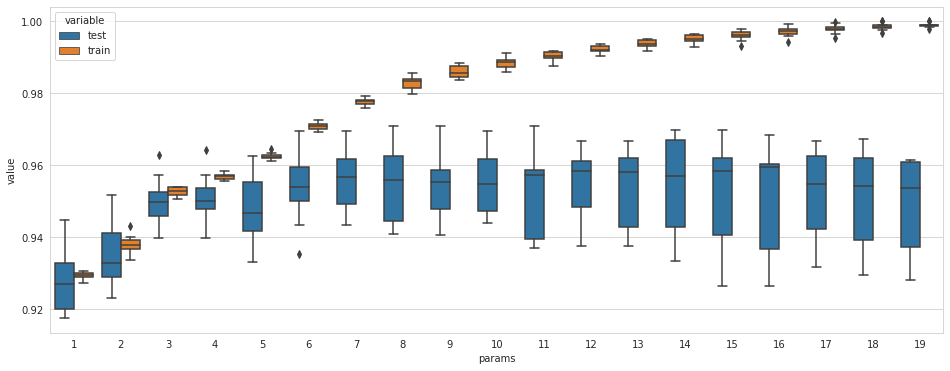

In [85]:
result = cv_result
grid_result = {"params":[d['max_depth'] for d in result['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    
plt.figure(figsize=(16, 6))
grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

In [86]:
params = {"min_samples_split": range(2,21,5),
              "min_samples_leaf": range(1,20,5),
             }

# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(x_cvtrain,
                                        y_cvtrain,
                                        DecisionTreeClassifier(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
 Best Parameters: {'min_samples_leaf': 16, 'min_samples_split': 2} with score of: 0.9535138002018677


### K - Nearest Neighbor

KNN adalah salah satu model non parametrik yang mudah untuk dipahami. Sebuah data yang baru akan diprediksi sesuai dengan data-data yang terdekat. Untuk menghitung jarak terdekat digunakan beberapa metric distance antara lain euclidean_distance atau manhattan_distance. Oleh karena itu, seluruh feature yang digunakan sebagai data training harus memiliki range yang mirip. Untuk itu, data trainig perlu di preprocess menggunakan scaler atau transformasi data lainnya.

satu-satunya hyperparameter yang dapat ditune pada model ini adalah nilai dari **n_neighbors** atau k. Semakin tinggi nilai k nya, model akan semakin simple karena perbedaan hasil prediksi akan semakin kecil. sedangkan nilai k yang kecil akan menghasilkan decision boundary yang tidak stabil sehingga model terlalu kompleks

hyperparameter yang mungkin dapat dicoba diubah antara lain **weight** dan **p**. weight dapat diubah antara default 'uniform' atau 'distance'(saat voting, data yang paling dekat akan sangat mempengaruhi hasil voting). p diubah untuk memilih apakah euclidean distance (p=2) atau manhattan_distance (p=1) yang digunakan menghitung distance.

In [87]:
params = {"n_neighbors": range(1,40,2)}

# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(x_cvtrain,
                                        y_cvtrain,
                                        KNeighborsClassifier(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
 Best Parameters: {'n_neighbors': 1} with score of: 0.9635025324405037


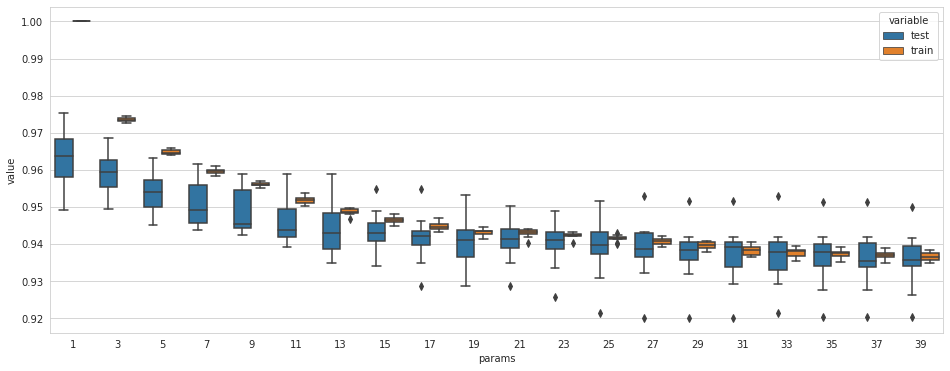

In [88]:
result = cv_result
grid_result = {"params":[d['n_neighbors'] for d in result['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    
plt.figure(figsize=(16, 6))
grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')

## Ensamble


![ensable](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_2_pu8tu6.png)

### Bagging

![bagging](https://miro.medium.com/max/1050/1*-PXzSlXtFEGTxgcmCyMkjQ.png)

Bagging dilakukan dengan menggunakan teknik sampling bootstraping. Bootstraping membuat beberapa set data dari data training dengan replacement. Tiap subset akan memiliki jumlah data yang sama dan digunakan untuk melatih base model secara paralel.

Salah satu contoh penerapan bagging adalah model Random Forest. Random forest membuat subset bukan hanya dengan sampling sample tapi juga features yang akan digunakan untuk melatih beberapa model decision tree. Pembuatan subset secara random ini memastikan tidak ada korelasi antara hasil prediksi satu tree dengan yg lain.

#### Random Forest Classifier

RF Train    0.999986
RF Test     0.974568
dtype: float64

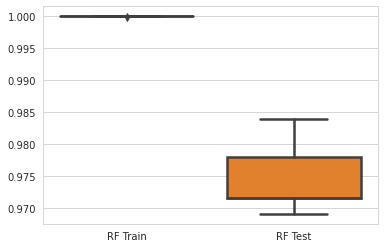

In [89]:
model_rf = RandomForestClassifier()
score_rf = cross_validate(model_rf, x_cvtrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True)
column = {'RF Train': score_rf['train_score'], 'RF Test': score_rf['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

### Boosting

![boosting](https://miro.medium.com/max/1050/1*trWLNnfyqdRklFmLGcF_Zw.png)

Algoritma boosting berfokus pada penggunaan informasi error dari model sebelumnya untuk meningkatkan model di level selanjutnya. Contoh model-model yang menggunakan pendekatan boosting ini adalah AdaBoost, CatBoost, XGBoost dan LightGBM. Model-model dengan pendekatan boosting cukup populer untuk digunakan karena pemenang pada beberapa kompetisi kaggle adalah peserta yang membangun model dengan pendekatan ini.

untuk model-model boosting, sklearn hanya menyediakan adaboost, sedangkan catboost, XGBoost dan LightGBM dapat digunakan dengan menginstall package model yang bersangkutan

#### ADABoost

ADA Train    0.968395
ADA Test     0.962469
dtype: float64

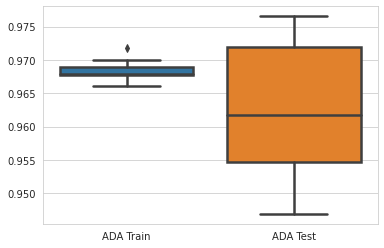

In [90]:
model_ada = AdaBoostClassifier()
score_ada = cross_validate(model_ada, x_cvtrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True, n_jobs=-1)
column = {'ADA Train': score_ada['train_score'], 'ADA Test': score_ada['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

#### XGBoost

XGB Train    0.982647
XGB Test     0.968148
dtype: float64

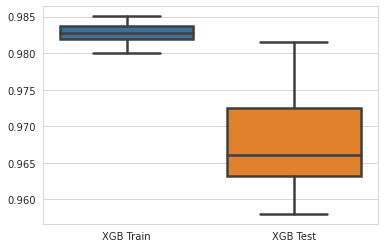

In [91]:
model_xgb = XGBClassifier(eval_metric='logloss')
score_xgb = cross_validate(model_xgb, x_cvtrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True, n_jobs=-1)
column = {'XGB Train': score_xgb['train_score'], 'XGB Test': score_xgb['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

#### Light GBM

LGB Train    0.982647
LGB Test     0.968148
dtype: float64

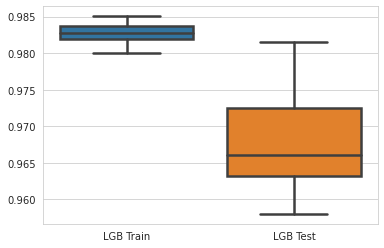

In [92]:
model_lgb = LGBMClassifier()
score_lgb = cross_validate(model_lgb, x_cvtrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True, n_jobs=-1)
column = {'LGB Train': score_xgb['train_score'], 'LGB Test': score_xgb['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

### Stacking

![stack](https://miro.medium.com/max/1050/1*IaqmYUSmQXE8AJw7moqwkA.png)

Stacking adalah pendekatan ensemble yang menggabungkan beberapa model sebagai model level 1 dan hasil prediksi semua model level 1 akan dijadikan data training untuk model level 2. Untuk model level 2, ada beberapa pendekatan yang dapat diambil:
- voting
- weighted voting
- menggunakan model classifie

#### Voting

VOTE Train    0.961440
VOTE Test     0.954691
dtype: float64

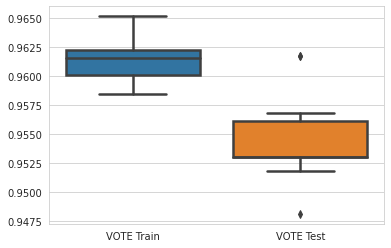

In [93]:
models = [
    ('lr', lr ),
    ('knn', neigh),
    ('svm', svc),
    ('nb', gnb),
    ('dt', dtree)]

model_voting = VotingClassifier(estimators=models)

score_vote = cross_validate(model_voting, x_cvtrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True)
column = {'VOTE Train': score_vote['train_score'], 'VOTE Test': score_vote['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

# Evaluasi Kinerja (Setelah Tunning)

## Menyiapkan data pengujian

In [94]:
#Load data training
df_alltest = pd.read_csv(link_test)

In [95]:
df_alltest['class'] = set_numeric_label(df_alltest['class'])
df_alltest = handleNA(df_alltest)
#imputed_test = pd.DataFrame(imputer.fit_transform(df_test.values),columns=df_test.columns)
imputed_test , MEDIAN_imputer , MICE_imputer = imputation( df_alltest , median_features )

In [96]:
imputed_test = imputed_test[fin_train.columns]

In [97]:
imputed_test.shape

(2000, 106)

In [98]:
#Memisahkan features dan label kelas
Y_testing = imputed_test['class']
X_testing = imputed_test.drop('class',axis=1)

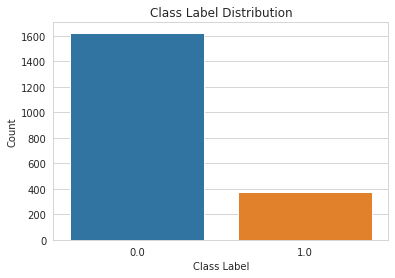

In [99]:
# Visualisasi dari distribusi data berdasarkan kelas label setelah dilakukan SMOTE
df_y_testing = pd.DataFrame(Y_testing)
sns.barplot(df_y_testing['class'].unique(),df_y_testing['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()


## Perbandingan Kinerja Berdasarkan Metrik

In [100]:
# Logistic Regression
lr_fix = LogisticRegression(C=0.1)
lr_fix.fit(x_cvtrain, y_cvtrain)

lr_pred = lr_fix.predict(X_testing)

In [101]:
#Naive Baye
nb_fix = GaussianNB(var_smoothing=1.0611380041264494e-16)
nb_fix.fit(x_cvtrain, y_cvtrain)

nb_pred = nb_fix.predict(X_testing)

In [102]:
#Svm
sv_fix = SVC(kernel='rbf', gamma=1e-16)
sv_fix.fit(x_cvtrain, y_cvtrain)

sv_pred = sv_fix.predict(X_testing)

In [103]:
#KNN
kn_fix = KNeighborsClassifier(n_neighbors=1)
kn_fix.fit(x_cvtrain, y_cvtrain)

kn_pred = kn_fix.predict(X_testing)

In [104]:
#Decision Tree
dt_fix = DecisionTreeClassifier(max_depth=9, min_samples_leaf=11, min_samples_split=17)
dt_fix.fit(x_cvtrain, y_cvtrain)

dt_pred = dt_fix.predict(X_testing)

In [105]:
#LGBMBoost
lgb = LGBMClassifier()

lgbclf = lgb.fit(x_cvtrain, y_cvtrain) 
lgb_pred = lgbclf.predict(X_testing.values)

In [106]:
#XGBoost
xgb = XGBClassifier()

xgbclf = xgb.fit(x_cvtrain, y_cvtrain) 
xgb_pred = xgbclf.predict(X_testing)

In [107]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200,max_depth=5,random_state=1, n_jobs=-1)
rfclf = rf.fit(x_cvtrain, y_cvtrain)
rf_pred = rfclf.predict(X_testing)

In [108]:
#AdaBoost
ada = AdaBoostClassifier(n_estimators=200, random_state=1)
adaclf = ada.fit(x_cvtrain, y_cvtrain)
ada_pred = adaclf.predict(X_testing.values)

In [109]:
models = [
    ('knn', neigh),
    ('nb', gnb),
    ('ada', ada),
    ('rf', rf)]

model_voting = VotingClassifier(estimators=models, n_jobs=-1)
model_voting.fit(x_cvtrain, y_cvtrain)
vot_pred = model_voting.predict(X_testing.values)

In [110]:
lspredict = []
lspredict.append(['Naive Bayes',nb_pred])
lspredict.append(['Logistic Regression',lr_pred])
lspredict.append(['SVC',sv_pred])
lspredict.append(['Decission Tree',dt_pred])
lspredict.append(['K-NN',kn_pred])
lspredict.append(['LGBMBoost',lgb_pred])
lspredict.append(['XGBoost',xgb_pred])
lspredict.append(['ADABoost',ada_pred])
lspredict.append(['Random Forest',rf_pred])
lspredict.append(['Voting',vot_pred])


In [111]:
#menjalankan evaluasi model
dfeval3 = pd.DataFrame(calculateMetric(lspredict, Y_testing), columns=['Classifier','Accuracy','Precision','Recall','F1-Score', 'AUC Score'])
dfeval3.sort_values(['F1-Score'], ascending=False)

Classifier  Accuracy  Precision    Recall  F1-Score  AUC Score
6              XGBoost    0.9695   0.908854  0.930667  0.919631   0.954564
5            LGBMBoost    0.9695   0.915344  0.922667  0.918991   0.951487
8        Random Forest    0.9630   0.857482  0.962667  0.907035   0.962872
9               Voting    0.9640   0.893506  0.917333  0.905263   0.946051
2                  SVC    0.9550   0.833724  0.949333  0.887781   0.952821
3       Decission Tree    0.9570   0.879265  0.893333  0.886243   0.932513
7             ADABoost    0.9570   0.923754  0.840000  0.879888   0.912000
0          Naive Bayes    0.9470   0.833747  0.896000  0.863753   0.927385
1  Logistic Regression    0.9400   0.811736  0.885333  0.846939   0.918974
4                 K-NN    0.9335   0.815104  0.834667  0.824769   0.895487

## Perbandingan Kinerja Berdasarkan Biaya

In [112]:
dfeval2 = pd.DataFrame(calculateCost(lspredict, Y_testing), columns=['Classifier','Jumlah FP','Jumlah FN','Biaya FP','Biaya FN','Total Biaya'])
dfeval2.sort_values(['Total Biaya'], ascending=True)

Classifier  Jumlah FP  Jumlah FN  Biaya FP  Biaya FN  Total Biaya
8        Random Forest         60         14       600      7000         7600
2                  SVC         71         19       710      9500        10210
6              XGBoost         35         26       350     13000        13350
5            LGBMBoost         32         29       320     14500        14820
9               Voting         41         31       410     15500        15910
0          Naive Bayes         67         39       670     19500        20170
3       Decission Tree         46         40       460     20000        20460
1  Logistic Regression         77         43       770     21500        22270
7             ADABoost         26         60       260     30000        30260
4                 K-NN         71         62       710     31000        31710

# Referensi

Dua, D. and Graff, C. (2019). UCI Machine Learning   Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science;


Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011;


Shetty, Rithwik, Predicting a Faliure in Scanias's Air Pressure System, 2021, https://towardsdatascience.com/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038.


KNN Model Complexity, 2020, https://www.geeksforgeeks.org/knn-model-complexity/


Brownlee, Jason, How to Use ROC Curves and Precision-Recall Curves for Classification in Python, 2018, https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


Saito, T., & Rehmsmeier, M. (2015). The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. PloS one, 10(3), e0118432. https://doi.org/10.1371/journal.pone.0118432


In [113]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn, fastai
